In [23]:
import csv
import numpy as np

with open('test_data_relu.csv', newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progress = []
    timings = []

    for row in reader:
        progress.append(float(row[0]))
        timings.append(float(row[1]))


    progress = np.array_split(progress[1:], 33)
    timings = np.array_split(timings[1:], 33)

with open('test_data_sigma.csv', newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progressB = []
    timingsB = []

    for row in reader:
        progressB.append(float(row[0]))
        timingsB.append(float(row[1]))

    progressB = np.array_split(progressB[1:], 33)
    timingsB = np.array_split(timingsB[1:], 33)


In [2]:
totalTimes = []
for times in timings:
	totalTimes.append(sum(times))

timeMean = np.mean(totalTimes)
print("Average time per run:", timeMean)
print("variance in time per run:", np.var(totalTimes))

d = 1.96 * np.sqrt(np.var(totalTimes)/33)
confidenceInterval = [timeMean - d, timeMean + d]

print("Confidence interval for time:", confidenceInterval)

Average time per run: 80.30050426540953
variance in time per run: 0.1452816164064851
Confidence interval for time: [80.17045603920477, 80.43055249161429]


In [3]:
totalProgress = []
for prog in progress:
	totalProgress.append(prog[-1])

progMean = np.mean(totalProgress)
print("Average prog per run:", progMean)
print("variance in prog per run:", np.var(totalProgress))

d = 1.96 * np.sqrt(np.var(totalProgress)/33)
confidenceInterval = [progMean - d, progMean + d]

print("Confidence interval for time:", confidenceInterval)

Average prog per run: 0.6629666666666666
variance in prog per run: 0.015083973737373736
Confidence interval for time: [0.6210625215366725, 0.7048708117966607]


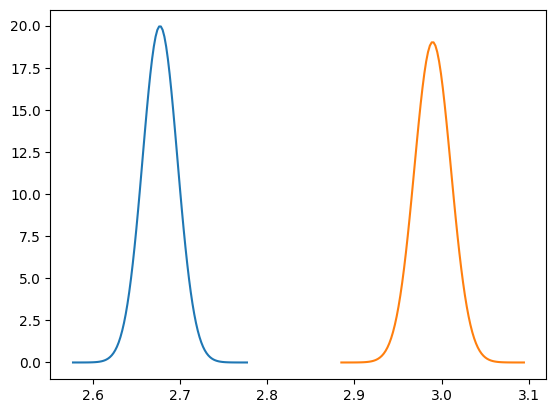

In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stats

chartData = []
for prog in timings:
	chartData = chartData +  prog.tolist()

chartData2 = []
for prog in timingsB:
	chartData2 = chartData2 +  prog.tolist()

mu = np.mean(chartData)
sigma = np.sqrt(np.var(chartData))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = np.mean(chartData2)
sigma = np.sqrt(np.var(chartData2))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

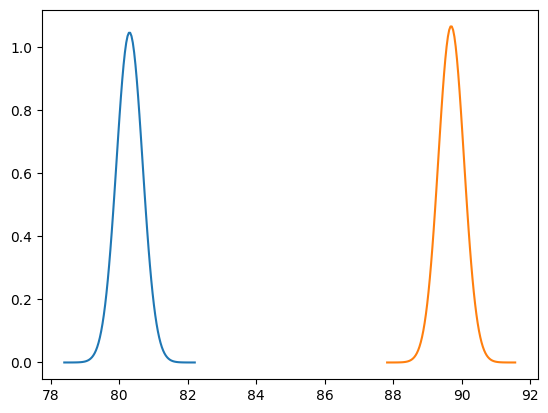

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats

chartData = []
for prog in timings:
	chartData.append(sum(prog.tolist()))

chartData2 = []
for prog in timingsB:
	chartData2.append(sum(prog.tolist()))

mu = np.mean(chartData)
sigma = np.sqrt(np.var(chartData))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = np.mean(chartData2)
sigma = np.sqrt(np.var(chartData2))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()